In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt

Import the credits file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tmdb_5000_credits.csv to tmdb_5000_credits.csv


In [4]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['tmdb_5000_credits.csv']))
print(df1.head())

   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3",

Import the movies.csv file

In [5]:
uploaded = files.upload()

Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [6]:
df2 = pd.read_csv(io.BytesIO(uploaded['tmdb_5000_movies.csv']))
print(df2.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

Merge two dataframe based on the id field which is common to both the dataframes

In [29]:
df1.columns = ['id','title','cast','crew']
df2 = df2.merge(df1,on='id')
print(df2.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

Find the mean of vote_average

In [30]:
me = df2['vote_average'].mean()
print(me)

6.092171559442011


Consider only movies with vote count from 90th percentile

In [31]:
q = df2['vote_count'].quantile(0.9)
print(q)

1838.4000000000015


In [32]:
q_movies = df2.copy().loc[df2['vote_count'] >= q]
q_movies.shape

(481, 35)

In [33]:
print(q_movies.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

Calculate new ratings based on vote_count and vote_average using IMDB formula

In [34]:
def weighted_rating(x,q=q,me=me):
  vc = x['vote_count']
  va = x['vote_average']
  return (vc/(vc+q) * va) + (q/(q+vc) * me)


In [35]:
q_movies['score'] = q_movies.apply(weighted_rating,axis=1)

Sort the array in descending order

In [45]:
q_movies = q_movies.sort_values('score',ascending=False)
q_movies = q_movies[['title','vote_count','vote_average','score']]
print(q_movies.head(10))

                                              title  vote_count  vote_average  \
1881                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3232                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3337                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1990                        The Empire Strikes Back        5879           8.2   

         score  
1881  8.059258  
662   7.939256  
65    7.920020  
3232  7.904645  
96    7.863239  
3337  

Simple illustration using popularity

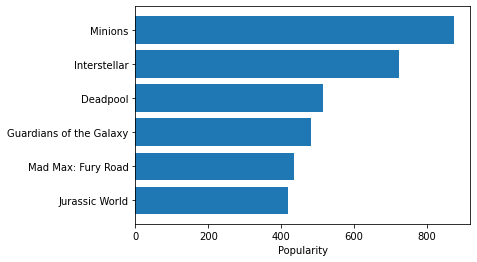

In [51]:
df2_new = df2.sort_values('popularity',ascending=False)
plt.barh(df2_new['title'].head(6),df2_new['popularity'].head(6))
plt.gca().invert_yaxis()
plt.xlabel('Popularity')
plt.show()

Output using our prediction

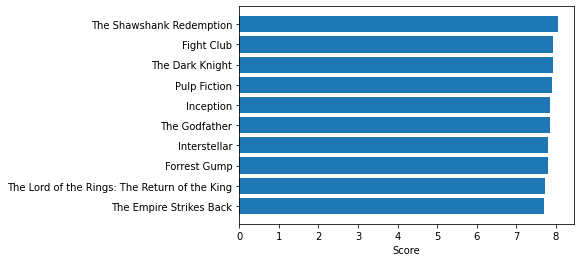

In [52]:
plt.barh(q_movies['title'].head(10),q_movies['score'].head(10))
plt.gca().invert_yaxis()
plt.xlabel('Score')
plt.show()